In [1]:
import pandas as pd
from feature_handling import FeatureHandling2 as FH
from splitter_sampler import SplitterSampler as SS
from dataframe_observer import DataframeObserver as DO
from modeling import Modeling
from evaluation import BinClsEvaluation,RegEvaluation

titanic = pd.read_csv('../data/titanic.csv')
DO.read_df_info(titanic)

------------------
846 rows, 12 columns.
------------------
               Dtype  Count  unique   unique%  missing  missing%
PassengerId    int64    846     846  1.000000        0  0.000000
Pclass         int64    846       3  0.003546        0  0.000000
Name          object    846     846  1.000000        0  0.000000
Sex           object    846       2  0.002364        0  0.000000
Age          float64    676      86  0.101655      170  0.200946
SibSp          int64    846       7  0.008274        0  0.000000
Parch          int64    846       7  0.008274        0  0.000000
Ticket        object    846     652  0.770686        0  0.000000
Fare         float64    846     243  0.287234        0  0.000000
Cabin         object    192     143  0.169031      654  0.773050
Embarked      object    844       3  0.003546        2  0.002364
Survived       int64    846       2  0.002364        0  0.000000
------------------


In [2]:
titanic = titanic[['Pclass','Sex','Fare','Age','SibSp',
                    'Parch','Embarked','Survived']]
DO.read_df_info(titanic)

------------------
846 rows, 8 columns.
------------------
            Dtype  Count  unique   unique%  missing  missing%
Pclass      int64    846       3  0.003546        0  0.000000
Sex        object    846       2  0.002364        0  0.000000
Fare      float64    846     243  0.287234        0  0.000000
Age       float64    676      86  0.101655      170  0.200946
SibSp       int64    846       7  0.008274        0  0.000000
Parch       int64    846       7  0.008274        0  0.000000
Embarked   object    844       3  0.003546        2  0.002364
Survived    int64    846       2  0.002364        0  0.000000
------------------


-------------------------------------
Type: int64
Rows: 846
Distinct: 2
Missing: 0
Missing%: 0.0
-------------------------------------
Top 2 values:
   Survived  Count         %     Cum.%
0         0    527  0.622931  0.622931
1         1    319  0.377069  1.000000
-------------------------------------


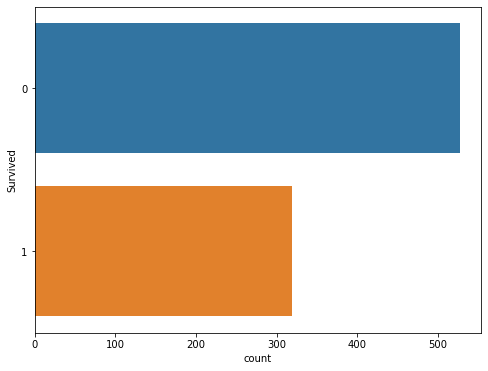

In [3]:
DO.describe_cat_col(titanic,'Survived')

In [4]:
train,test = SS.split_df(titanic)
train.shape, test.shape

((676, 8), (170, 8))

In [5]:
DO.read_df_info(train)

------------------
676 rows, 8 columns.
------------------
            Dtype  Count  unique   unique%  missing  missing%
Pclass      int64    676       3  0.004438        0  0.000000
Sex        object    676       2  0.002959        0  0.000000
Fare      float64    676     221  0.326923        0  0.000000
Age       float64    537      83  0.122781      139  0.205621
SibSp       int64    676       7  0.010355        0  0.000000
Parch       int64    676       6  0.008876        0  0.000000
Embarked   object    675       3  0.004438        1  0.001479
Survived    int64    676       2  0.002959        0  0.000000
------------------


-------------------------------------------------
['Age', 'Embarked']
0-0    536
1-0    139
0-1      1
dtype: int64


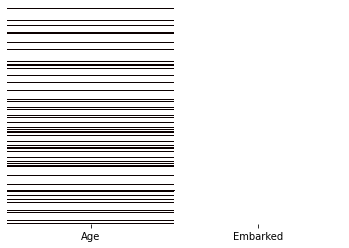

In [6]:
fh = FH(train, test)
DO.missing_pattern(train,only_missing_col=True)

In [7]:
fh.imputer('Age','median')
fh.imputer('Embarked','mode')
train_ed,test_ed=fh.general_encoder(['Age'],None,['Pclass','Sex','SibSp','Parch','Embarked','Survived'])

In [8]:
DO.read_df_info(train_ed)
DO.read_df_info(test_ed)

------------------
676 rows, 25 columns.
------------------
              Dtype  Count  unique   unique%  missing  missing%
Age         float64    676      83  0.122781        0       0.0
Pclass_1    float64    676       2  0.002959        0       0.0
Pclass_2    float64    676       2  0.002959        0       0.0
Pclass_3    float64    676       2  0.002959        0       0.0
Sex_female  float64    676       2  0.002959        0       0.0
Sex_male    float64    676       2  0.002959        0       0.0
SibSp_0     float64    676       2  0.002959        0       0.0
SibSp_1     float64    676       2  0.002959        0       0.0
SibSp_2     float64    676       2  0.002959        0       0.0
SibSp_3     float64    676       2  0.002959        0       0.0
SibSp_4     float64    676       2  0.002959        0       0.0
SibSp_5     float64    676       2  0.002959        0       0.0
SibSp_8     float64    676       2  0.002959        0       0.0
Parch_0     float64    676       2  0.002959

In [9]:
X_train, X_test, y_train, y_test= SS.split_train_test(train_ed,test_ed,'Fare')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 24), (170, 24), (676,), (170,))

In [10]:
print(X_train.columns.tolist())
print(X_test.columns.tolist())

['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived_0', 'Survived_1']
['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived_0', 'Survived_1']


In [11]:
md = Modeling(X_train, X_test, y_train, y_test, task='reg', metric='r2', random_state=1445)
y_score, best_model, best_score, best_params = \
    md.modeling(model='rf',hp={'n_estimators':[100,200,400],'max_depth':[3,5,7,9]} )

In [12]:
re = RegEvaluation(y_score,y_test)

In [13]:
re.detailed_metrics()


Explained_Variance_Score: 0.33405090074379196
Mean_Absolute_Error: 12.842870744247103
Mean_Absolute_Percentage_Error: 3700199329004818.0
Mean_Squared_Error: 1520.4944722710597
Root_Mean_Squared_Error: 38.99351833665513
Pearson_Coefficient: 0.5782012046683241
R2_Score: 0.33391765798024475


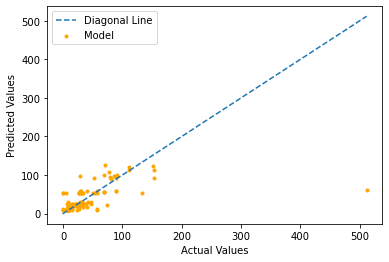

In [14]:
re.scatter_plot()

min_raw: -452.2670321187054
max_raw: 67.4003706647276
min_clipped: -49.42654388842418
max_clipped: 51.63667877374684
q25: -0.30076775276382506
q75: 3.5852370494410017
median: 2.140647676788708
avg: 1.9877085970846555
std: 12.965643817047884
--------------------------------------
W test statistic: 0.8544217348098755
p-value: 2.1828951840552335e-11
Error is not normally distributed.
--------------------------------------
Error plot in 2%-98% quantile.


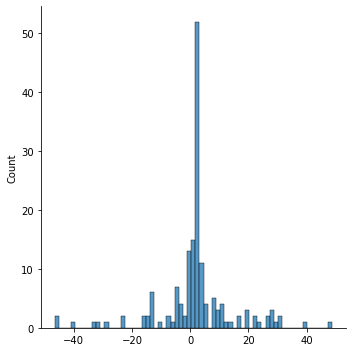

In [15]:
re.error_distribution()

In [16]:
from scipy import stats
import numpy as np
np.random.seed(12345678)
x = stats.norm.rvs(loc=5, scale=3, size=100)
shapiro_test = stats.shapiro(x)

print('W test statistic: '+str(shapiro_test.statistic))
print('p-value: '+str(shapiro_test.pvalue))
if shapiro_test.pvalue>=0.05:
    print('<Error is normally distributed> cannot be rejected.')
else:
    print('Error is not normally distributed.')


W test statistic: 0.9772805571556091
p-value: 0.08144091814756393
<Error is normally distributed> cannot be rejected.


In [17]:
best_model

RandomForestRegressor(max_depth=3, n_estimators=200, random_state=1445)